# 패션 MNIST를 이용한 연습
# 1. 단층 신경망

## 데이터 로드

In [1]:
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 크기 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


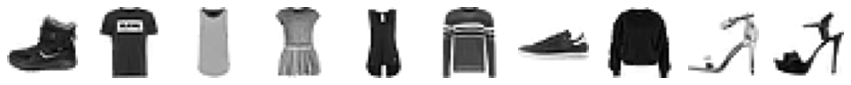

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(1, 10, figsize=(15,10))
for i in range(10):
    axs[i].imshow(train_images[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
train_scaled = train_images / 255.0
# 여기서 reshape해주는 방식은 행 주요 순서로 인덱싱(column major order)
# 래스터 스캔 순서(raster scan order)
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_scaled, val_scaled, train_label, val_label = train_test_split(train_scaled, train_labels, test_size=0.2)

In [9]:
print(train_scaled.shape, train_label.shape)

(48000, 784) (48000,)


In [10]:
print(val_scaled.shape, val_label.shape)

(12000, 784) (12000,)


## FCL 생성

In [11]:
# FCL 층 (dense layer) 생성
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, )) # (784, ) : 텐서에서 벡터 표현

In [12]:
# Sequential 모델
model = keras.Sequential()
model.add(dense)

## 컴파일
- 케라스 모델은 훈련하기 전에 compile() 해야한다.
- 여기서 반드시 지정해줘야 할것은 loss 함수다

In [13]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

- loss function
    - binary_crossentropy : 이진 분류
    - categorical_crossentropy : 다중 분류(원핫인코딩)
    - sparse_categorical_crossentropy : 다중분류(원핫인코딩 안된것)

## 학습

In [14]:
model.fit(train_scaled, train_label, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6100 - accuracy: 0.7931
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4807 - accuracy: 0.8377
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4576 - accuracy: 0.8475
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4458 - accuracy: 0.8511
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4376 - accuracy: 0.8534


## 평가

In [15]:
model.evaluate(val_scaled, val_label)

375/375 [==============================] - 1s 2ms/step - loss: 0.4527 - accuracy: 0.8506


[0.4526956379413605, 0.8505833148956299]

## 케라스 모델 정리 - 전체 플로우
```python
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))
model = keras.Sequential()
model.add(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_label, epochs=5)
model.evaluate(val_scaled, val_label)
```

# 텐서플로우 핵심 함수

## Dense
- keras.layers에 포함
- 신경망에서 가장 기본 층인 밀집층을 만드는 클래스
- 이 층에 첫번째 매개변수는 뉴런의 개수
- activation 함수도 지정
- Sequential 첫 번째 추가되는 층에서는 input_shape를 넣어줘야 한다. (1D 텐서)
- Dense층은 연결 가중치를 무작위로 초기화한다. 편향은 0으로 초기화한다. (대칭성을 깨뜨리기 위해)
- 다른 방법으로 초기화 방법을 사용하고 싶다면 층을 만들 때 kernel_initializer와 bias_initializer 매개변수를 지정해주면 된다.

## Sequential
- keras에 포함
- 신경망 모델을 만드는 클래스
- 객체를 생성할 때 신경망 모델에 추가할 층을 지정할 수 있다.

## compile()
- 모델 객체를 만든 후 훈련하기 전에 사용할 **손실 함수**와 **측정 지표**, **옵티마이저** 등을 지정하는 메소드
- loss function 지정
- metrics 지정
- optimizer 지정

## fit()
- 모델 훈련 메소드
- 1, 2번째 파라미터에 train_images와 train_label을 입력
- epochs를 준다.

## evaluate()
- 모델 성능을 평가하는 메소드
- 1, 2번째 파라미터에 val_images, val_label을 입력.
- compile에서 준 loss와 metrics를 토대로 측정 지표를 출력한다.

# 2. 심층 신경망
- 단층 신경망에서 입력, 은닉, 출력층으로 층이 더 많아진 구조

In [16]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [17]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

## 레이어 생성

In [18]:
# 왜 100개로 할까?
# 첫 번째 레이어는 input_shape를 지정 해줘야 한다.
dense1 = keras.layers.Dense(100, activation='relu', input_shape=(784, ))
dense2 = keras.layers.Dense(10, activation='softmax')

## 모델 생성
add함수를 써도 되지만 다음과 같이 해도 된다. (add가 더 편하고 직관적인듯?)\
리스트로 묶어서 전달해줘도 된다.
``` python
model = keras.Sequential([dense1, dense2])
```

In [19]:
model = keras.Sequential()
model.add(dense1)
model.add(dense2)

## 모델 summary()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### Output Shape를 보면 None?
- 아직 출력 사이즈가 정의되지 않았다.
- 전체 데이터에서 batch size를 정의해주지 않았기 때문이다.
- 케라스 default 배치 크기는 32

### Param
- 78500 = 784 * 100 + 100 (인풋이 784이고 출력이 100개니까, 또한 100개에서 bias가 100개라)
- 1010 = 100 * 10 + 10 (다시 인풋이 100개가 되고 출력이 10개니까, 또한 10개에서 bias가 10개라)

## get_weights()
- layer에 포함된 가중치와 편향값을 리턴받을 수 있다.

In [26]:
# 모델에 포함된 layer들을 볼 수 있다.
model.layers

In [36]:
weights, biases = model.layers[1].get_weights()
weights[0], biases # 각 뉴런의 가중치와 편향값을 알 수 있다.

(array([-0.00398829, -0.05920272,  0.05326228,  0.01360321, -0.07299741,
        -0.00899249,  0.07510181, -0.0646515 , -0.0707384 , -0.02730439,
        -0.04455523,  0.05546515,  0.05031317, -0.02970751, -0.03296321,
         0.03031457, -0.02678061,  0.0427753 , -0.01233291,  0.04402161,
         0.07991859,  0.03602008, -0.06189804,  0.03470431, -0.02545257,
         0.07315147, -0.01226153, -0.0042432 , -0.05727499,  0.08162817,
        -0.0222119 , -0.04590131, -0.0135214 ,  0.04014213, -0.02151297,
        -0.04212127, -0.03497126, -0.01039384,  0.00303087, -0.01163852,
        -0.02755257,  0.06236632, -0.02027962,  0.00293138,  0.02864356,
         0.04335587, -0.07656506, -0.00110195,  0.06225391, -0.01178263,
         0.02523161,  0.03663468,  0.07058652,  0.04427546,  0.07234952,
         0.0708462 ,  0.07448696,  0.06944002,  0.00142579, -0.05116056,
         0.02040806, -0.04637632,  0.05721387, -0.01501978, -0.01362843,
        -0.06524834,  0.05462645,  0.02195921,  0.0

## 학습

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5325 - accuracy: 0.8128
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3957 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3564 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3353 - accuracy: 0.8791
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3216 - accuracy: 0.8860


## Flatten

numpy의 reshape를 써도 되지만 keras는 Flatten 클래스를 지원한다.
- 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다.
- 입력에 곱해지는 가중치나 절편이 없다(NN 성능에 기여 X)

In [37]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


첫번째 flatten 층의 Param은 0 (영향 X)

## 학습

In [41]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 여기선 Flatten을 쓰기에 reshape가 필요없다.
train_scaled = train_input / 255.0

# 이번엔 label을 one-hot encoding 해서 줘보자.
from tensorflow.keras.utils import to_categorical
train_target = to_categorical(train_target)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [44]:
# 원핫이기에 loss = 'categorical_crossentropy'
# 이번엔 optimizer='sgd'를 주자.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=30, validation_data=(val_scaled, val_target))

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2873 - accuracy: 0.8986 - val_loss: 0.3391 - val_accuracy: 0.8788
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2857 - accuracy: 0.8987 - val_loss: 0.3549 - val_accuracy: 0.8708
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.8989 - val_loss: 0.3332 - val_accuracy: 0.8815
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.9006 - val_loss: 0.3395 - val_accuracy: 0.8783
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2791 - accuracy: 0.9025 - val_loss: 0.3343 - val_accuracy: 0.8819
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2775 - accuracy: 0.9017 - val_loss: 0.3394 - val_accuracy: 0.8793
Epoch 7/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.9033 - val_loss: 0.3292 - val_accuracy:

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# dir(history) 
# 'epoch', 'history', 'model', 'params',

In [61]:
print(history.epoch)
print(history.history) # 각 에포크별 loss, accurcay, val_loss, val_accuracy를 담고있음
print(history.model) # 모델 객체를 담고있다.

print(history.params)  # {'verbose': 1, 'epochs': 30, 'steps': 1500} 여기서 verbose=1은 결과창을 출력한다란 의미
# steps는 train 데이터가 48000개고, 기본 배치사이즈가 32라 iter가 1500번 일어나서 steps=1500임

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.28725099563598633, 0.2857491075992584, 0.2835758924484253, 0.28085213899612427, 0.2791270613670349, 0.2774924039840698, 0.2756357192993164, 0.2733365595340729, 0.27074024081230164, 0.2689001262187958, 0.26733502745628357, 0.2656187415122986, 0.264078825712204, 0.2617911100387573, 0.2596701979637146, 0.25788891315460205, 0.2569182217121124, 0.25421375036239624, 0.2529357671737671, 0.25184231996536255, 0.2490490972995758, 0.24881842732429504, 0.24671868979930878, 0.24538028240203857, 0.24334381520748138, 0.2424134761095047, 0.2401474267244339, 0.23895134031772614, 0.23669883608818054, 0.23588168621063232], 'accuracy': [0.8986250162124634, 0.8987083435058594, 0.8988958597183228, 0.9005833268165588, 0.9024791717529297, 0.9016666412353516, 0.9032708406448364, 0.9045416712760925, 0.9039999842643738, 0.9043750166893005, 0.9045624732971191, 0.9070000052452087, 0.9064583182

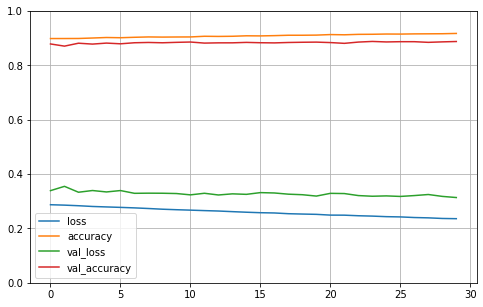

In [62]:
# 시각화
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

## 평가

In [63]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3137 - accuracy: 0.8878


[0.3136928677558899, 0.8877500295639038]

## 예측

In [64]:
X_new = val_scaled[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.94, 0.  , 0.05, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]],
      dtype=float32)

In [68]:
X_new = X_new * 255.

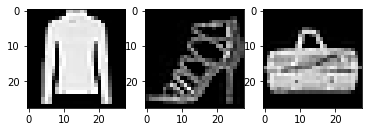

In [77]:
plt.subplot(131) # 오 나름대로 맞음
plt.imshow(X_new[0], 'gray')
plt.subplot(132)
plt.imshow(X_new[1], 'gray') 
plt.subplot(133)
plt.imshow(X_new[2], 'gray')
plt.show()

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### model.predict_claases는 depricated되었다.... np.argmax로 가자..

In [90]:
import numpy as np
np.argmax(model.predict(X_new), axis=-1)

array([2, 5, 8], dtype=int64)

In [93]:
[class_names[i] for i in np.argmax(model.predict(X_new), axis=-1)]

['Pullover', 'Sandal', 'Bag']